In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import joblib

In [2]:
# Load the dataset
sonar_data = pd.read_csv('C:/Users/ADMIN/Downloads/sonar_data.csv', header=None)

In [3]:
# Separate the data and labels
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

In [4]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)

In [5]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [6]:
# Support Vector Machine (SVM)
svm_model = SVC(class_weight='balanced', random_state=1)
svm_model.fit(X_train_scaled, Y_train)

SVC(class_weight='balanced', random_state=1)

In [8]:
# Save the trained model and scaler
joblib.dump(svm_model, 'best_svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler
print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [9]:
# After fitting the scaler
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler

['scaler.pkl']

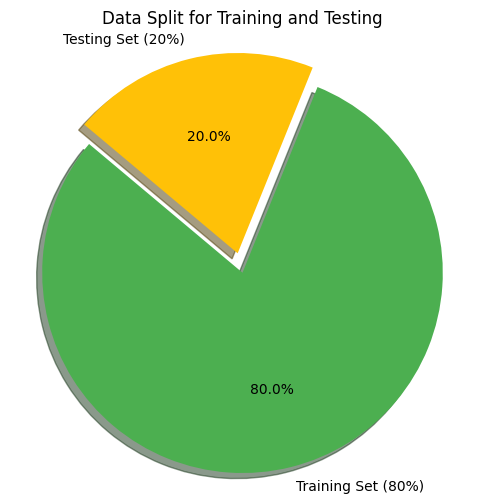

In [1]:
import matplotlib.pyplot as plt

# Sizes of train and test data
train_size = 80  # 80%
test_size = 20   # 20%

# Pie chart labels
labels = ['Training Set (80%)', 'Testing Set (20%)']

# Data to plot
sizes = [train_size, test_size]
colors = ['#4CAF50', '#FFC107']  # Green for training, Yellow for testing
explode = (0.1, 0)  # explode 1st slice for emphasis

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data Split for Training and Testing')
plt.show()


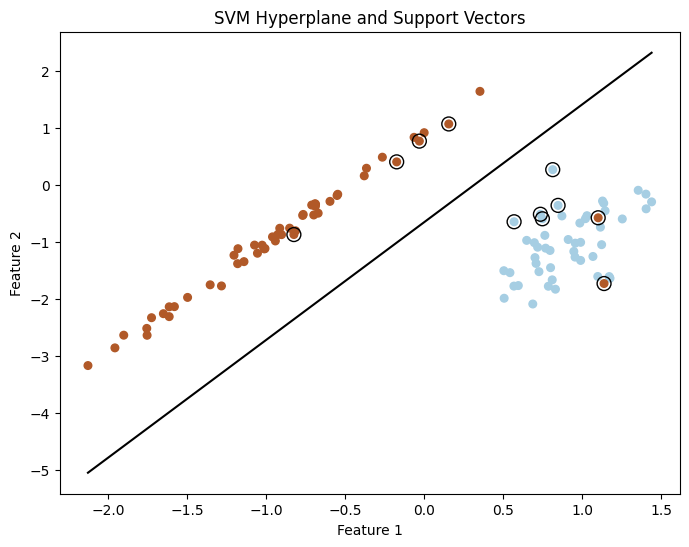

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# Generate synthetic data for visualization
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

# Create an SVM classifier with a linear kernel
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Plot the data points and decision boundary
plt.figure(figsize=(8,6))

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Get the coefficients and intercept for the decision boundary
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(X[:, 0]), max(X[:, 0]))
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the decision boundary (hyperplane)
plt.plot(xx, yy, 'k-')

# Highlight support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.title('SVM Hyperplane and Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
